In [1]:
# %pip install pydub
# %pip install sounddevice
# %pip install signal
# %pip install librosa
# %pip install spafe

In [8]:
import librosa
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import sounddevice as sd
from scipy.io import wavfile
from scipy import signal
from spafe.features.gfcc import gfcc

### Загрузка звуков

In [3]:
first_sound = 'Хруст-01.wav'
second_sound = 'Хруст-02.wav'

In [4]:
sample_rate, sound_1 = wavfile.read(first_sound)
duration_1 = len(sound_1) / sample_rate
time_1 = np.arange(0, duration_1, 1 / sample_rate)

print('Звук 1')
print('Sampling Rate:', sample_rate)
print(f"Длительность {duration_1}")

Звук 1
Sampling Rate: 44100
Длительность 0.8616780045351474


In [5]:
sample_rate, sound_2 = wavfile.read(second_sound)
duration_2 = len(sound_2) / sample_rate
time_2 = np.arange(0, duration_2, 1 / sample_rate)

print('Звук 2')
print('Sampling Rate:', sample_rate)
print(f"Длительность {duration_2}")

Звук 2
Sampling Rate: 44100
Длительность 0.8616780045351474


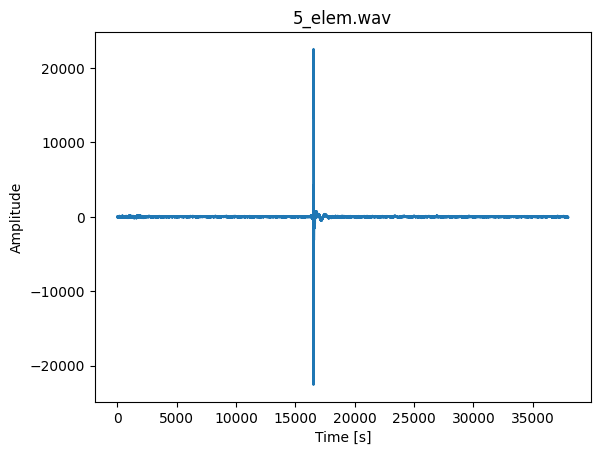

In [6]:
plt.plot(sound_1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('5_elem.wav')
plt.show()

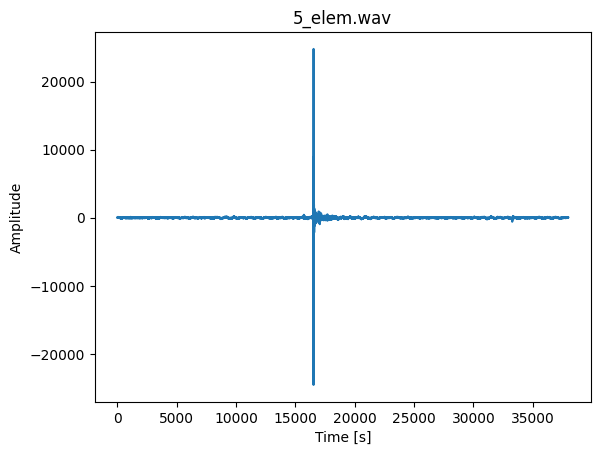

In [7]:
plt.plot(sound_2)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('5_elem.wav')
plt.show()

In [ ]:
def play_audio(noise: np.ndarray, freq: float) -> None:
    sd.play(noise / np.max(np.abs(noise)), freq)
    sd.wait()


# play_audio(sound_1, sample_rate)
# play_audio(sound_2, sample_rate)

### Спектрограммы

In [9]:
def make_spectrogram(sound, title):
    adata = sound[:]
    s = sample_rate
    fr, tm, spgram = signal.spectrogram(adata, s)
    lspg = np.log(spgram)
    plt.pcolormesh(tm, fr, lspg, shading='auto')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (sec)')
    plt.title(title)
    plt.show()

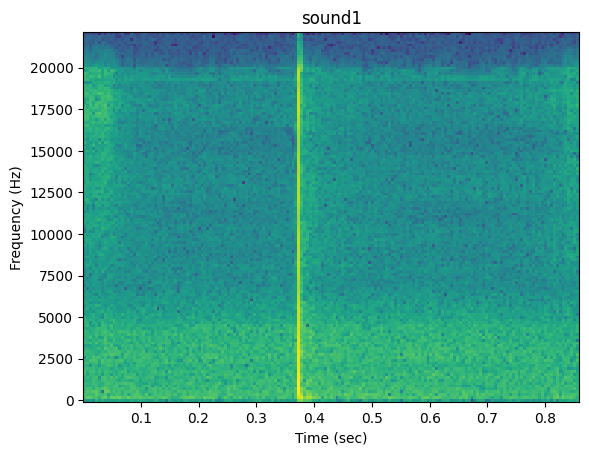

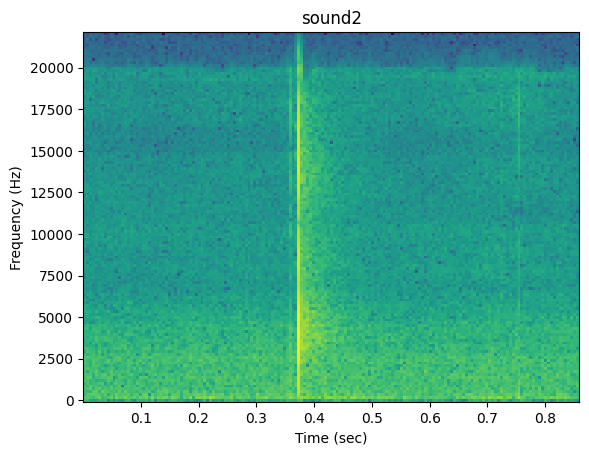

In [10]:
make_spectrogram(sound_1, 'sound1')
make_spectrogram(sound_2, 'sound2')

### Мел-кепстральные и гамматон-частотные кепстральные коэффициенты

In [11]:
samples1, sample_rate1 = librosa.load(first_sound)

y1 = samples1
sr1 = sample_rate1
mfccs1 = librosa.feature.mfcc(y=y1, sr=sr1)

samples2, sample_rate2 = librosa.load(second_sound)

y2 = samples2
sr2 = sample_rate2
mfccs2 = librosa.feature.mfcc(y=y2, sr=sr2)

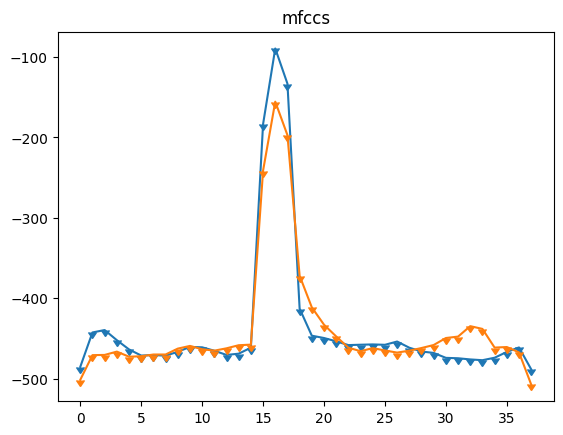

In [12]:
s1 = mfccs1[0:1, :][0, :]
t1 = np.arange(len(s1))
s2 = mfccs2[0:1, :][0, :]
t2 = np.arange(len(s2))
plt.plot(t1, s1.reshape(38, 1), marker=matplotlib.markers.CARETDOWNBASE)
plt.plot(t2, s2.reshape(38, 1), marker=matplotlib.markers.CARETDOWNBASE)
plt.title('mfccs')
plt.show()

In [13]:
samples1, sample_rate1 = librosa.load(first_sound)

y1 = samples1
sr1 = sample_rate1
gfccs1 = gfcc(y1, fs=sr1, num_ceps=1)

samples2, sample_rate2 = librosa.load(second_sound)

y2 = samples2
sr2 = sample_rate2
gfccs2 = gfcc(y2, fs=sr2, num_ceps=1)   

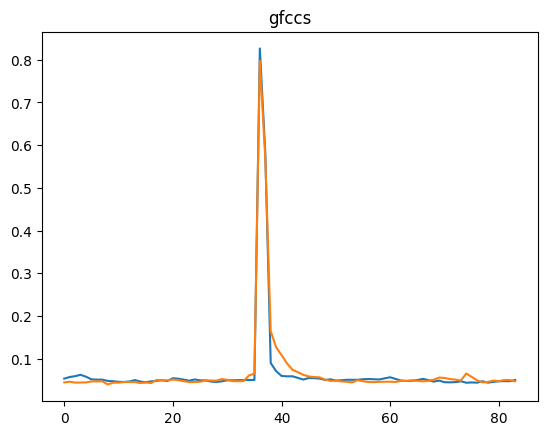

In [163]:
plt.plot(gfccs1)
plt.plot(gfccs2)
plt.title('gfccs')
plt.show()

### Итоги

Видно, что звуки (хруст моих двух пальцев) очень похожи, так же как и их спектрограммы. Мел-кепстаральные коэффициенты также схожи, но для певрого звука пик выше. гамматон-частотные кепстральные коэффициенты почти полностью совпадают, за исключением более пологого правого "склона" для второго звука